# Рубежный контроль №2

### Бахман Александр ИУ5-65Б

## Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

- Метод №1: Метод опорных векторов
- Метод №2: Градиентный бустинг

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
import sklearn.metrics
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [14]:
#Загрузка датасета Ирисов Фишера
#и преобразование его в Dataframe
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data['target'] = pd.Series(iris.target)#создадим столбец целевой признака
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
#Проверка типов данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [16]:
#Размер датасета
data.shape

(150, 5)

In [17]:
#Проверка пустых значений
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<AxesSubplot:>

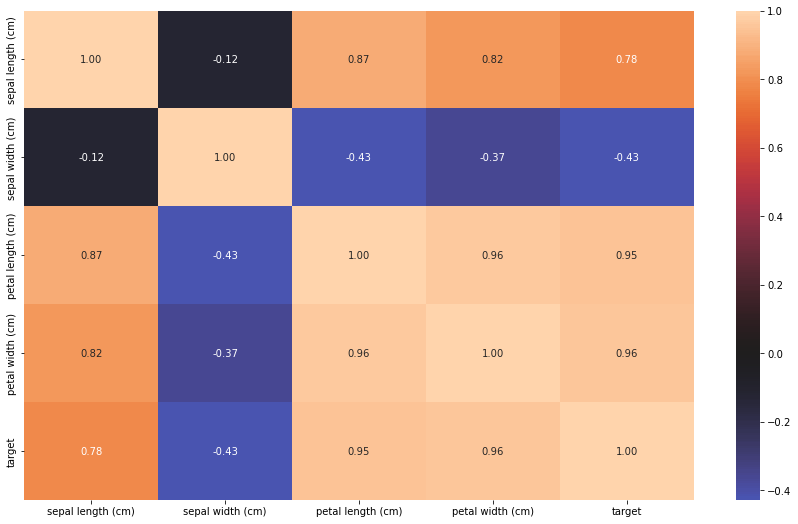

In [18]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

В качестве целевого признака возьмём столбец "target"

In [20]:
#Разделение выборки на обучающую и тестовую
xArray = data.drop("target", axis=1)
yArray = data["target"]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Метод опорных векторов

Будем решать задачу регресии

In [68]:
trainX.shape, testX.shape

((120, 4), (30, 4))

In [69]:
svr = SVR()
svr.fit(trainX, trainY)

SVR()

In [70]:
svr_pred = svr.predict(testX)

Для оценки качества будем использовать:
- коэффициента детерминации, чтобы узнать насколько модель близка к истинной
- корень из средней квадратичной ошибки, чтобы выделить большие ошибки в предсказании модели

In [71]:
R2 = r2_score(testY, svr_pred)
RMSE = mean_squared_error(testY, svr_pred, squared=True)

In [72]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2))
print("Корень из средней квадратичной ошибки: {}".format(RMSE))

Оценка качества модели с помощью коэффициента детерминации: 0.9116297686100936
Корень из средней квадратичной ошибки: 0.04762173580456064


С помощью используемых метрик, можем сделать вывод, что качество модели высокое, т.к. коэф. детерминизации почти равен 1, а RMSE почти равно 0. Это подтверждает и то, что целевой признак сильно коррелирует с остальными признаками.
Проверим это и с помощью кросс валидации

In [73]:
scoring = {'RMSE': 'neg_root_mean_squared_error', 
           'R2': 'r2'}
scores = cross_validate(SVR(), 
                        trainX, trainY, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00299358, 0.00199461, 0.00299263]),
 'score_time': array([0.00298929, 0.00199533, 0.00199389]),
 'test_RMSE': array([-0.17138313, -0.19616441, -0.22509426]),
 'train_RMSE': array([-0.19252744, -0.19001615, -0.17624036]),
 'test_R2': array([0.96054116, 0.94079927, 0.92174915]),
 'train_R2': array([0.94291924, 0.94904536, 0.95593255])}

In [74]:
-np.mean(scores['train_R2']), -np.mean(scores['test_R2']), \
-np.mean(scores['train_RMSE']), -np.mean(scores['test_RMSE'])

(-0.9492990518175067,
 -0.9410298566249193,
 0.18626132031298592,
 0.19754726803766423)

Как мы можем видеть, значения метрик аналогичны

### Градиентный бустинг

In [54]:
GB = GradientBoostingRegressor(random_state=1)
GB.fit(trainX, trainY)

GradientBoostingRegressor(random_state=1)

In [55]:
R2 = r2_score(testY, GB.predict(testX))

In [56]:
RMSE = mean_squared_error(testY, GB.predict(testX), squared=True)

In [57]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2))
print("Корень из средней квадратичной ошибки: {}".format(RMSE))

Оценка качества модели с помощью коэффициента детерминации: 0.9326836826396206
Корень из средней квадратичной ошибки: 0.03627601546642667


В данном случае, можем увидеть, что ансамблевая модель градиентного бустинга предсказывает значения даже чуть с большей точностью. Проверим это также с помощью кросс валидации.

In [58]:
scoring = {'RMSE': 'neg_root_mean_squared_error', 
           'R2': 'r2'}
scores = cross_validate(GradientBoostingRegressor(), 
                        trainX, trainY, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.03889704, 0.02492833, 0.01300812]),
 'score_time': array([0.00298834, 0.0009985 , 0.        ]),
 'test_RMSE': array([-0.1815028 , -0.19534776, -0.31343478]),
 'train_RMSE': array([-1.30287607e-02, -8.34934838e-03, -9.16276190e-05]),
 'test_R2': array([0.95574372, 0.94129116, 0.84827589]),
 'train_R2': array([0.9997386 , 0.99990162, 0.99999999])}

In [59]:
-np.mean(scores['train_R2']), -np.mean(scores['test_R2']), \
-np.mean(scores['train_RMSE']), -np.mean(scores['test_RMSE'])

(-0.9998800682685892,
 -0.9151035885627822,
 0.007156578899919144,
 0.23009511581480857)

In [60]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

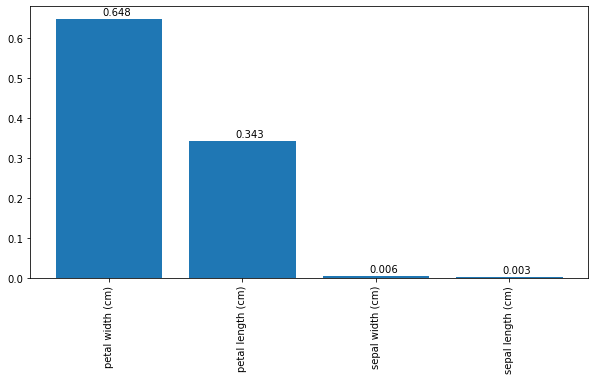

In [62]:
# Проверим важность признаков
_,_ = draw_feature_importances(GB, trainX)